<a href="https://colab.research.google.com/github/JUANJO2410/AMIGOSECRETO/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



     Tienda            Total
0  tienda_1 1,150,880,400.00
1  tienda_2 1,116,343,500.00
2  tienda_3 1,098,019,600.00
3  tienda_4 1,038,375,700.00


Text(0.5, 1.0, 'Total de Ventas por Tienda')

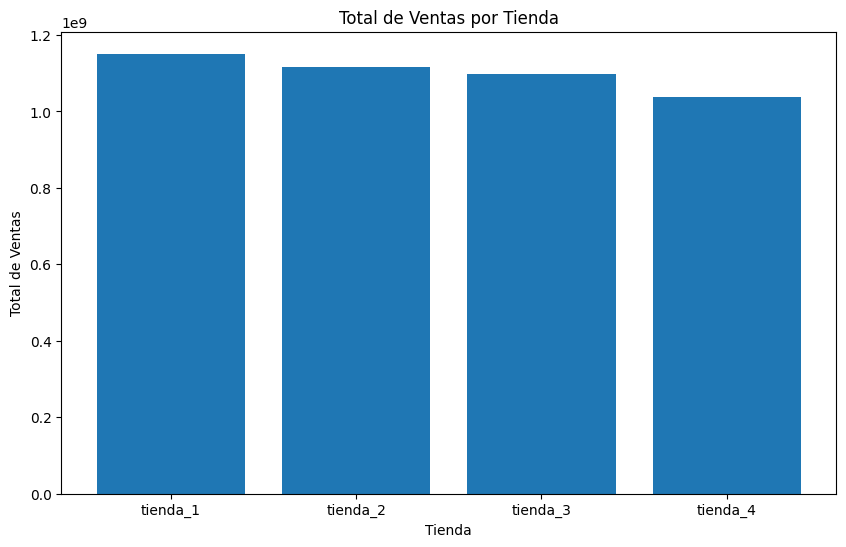

In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt

archivos = url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

totales = {
    'tienda_1': tienda['Precio'].sum(),
    'tienda_2': tienda2['Precio'].sum(),
    'tienda_3': tienda3['Precio'].sum(),
    'tienda_4': tienda4['Precio'].sum()
}

pd.options.display.float_format = '{:,.2f}'.format
df_totales = pd.DataFrame(list(totales.items()), columns=['Tienda', 'Total'])

print(df_totales)

plt.figure(figsize=(10, 6))
plt.bar(df_totales['Tienda'], df_totales['Total'])
plt.xlabel('Tienda')
plt.ylabel('Total de Ventas')
plt.title('Total de Ventas por Tienda')

# 2. Ventas por categoría

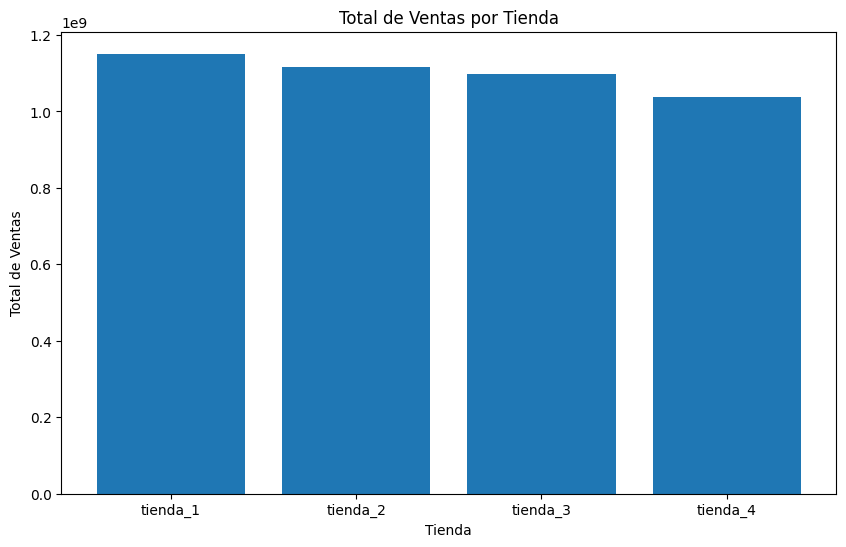

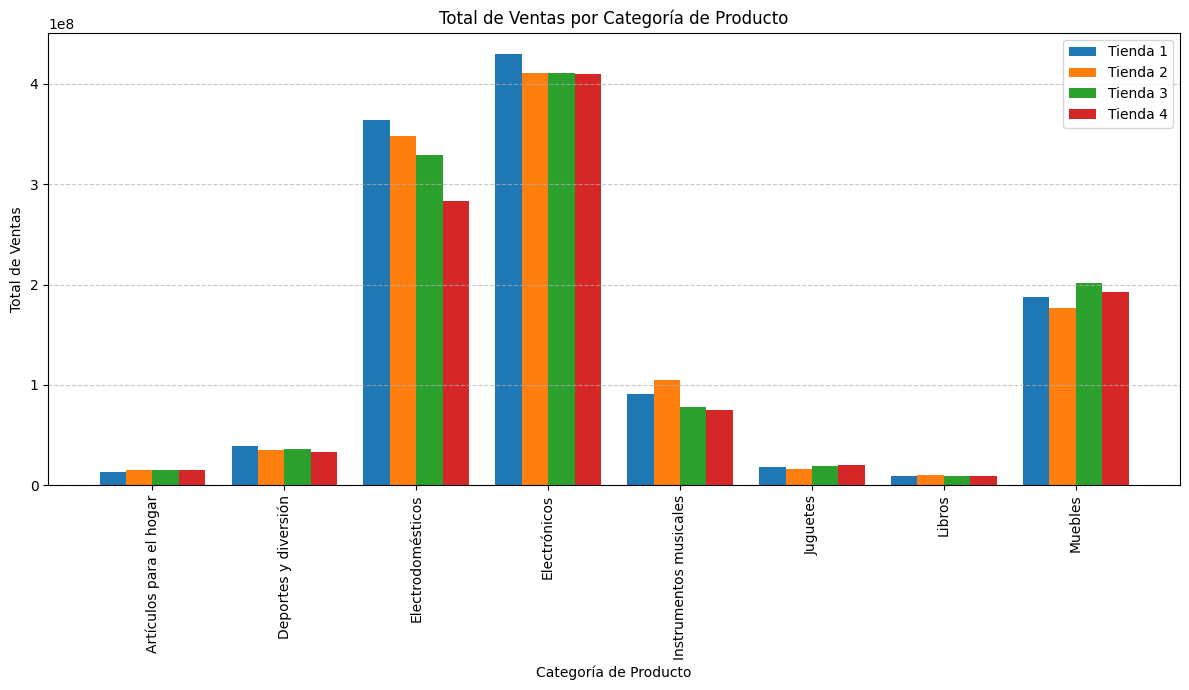

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#Origen datos de Juan

archivos = url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

totales = {
    'tienda_1': tienda['Precio'].sum(),
    'tienda_2': tienda2['Precio'].sum(),
    'tienda_3': tienda3['Precio'].sum(),
    'tienda_4': tienda4['Precio'].sum()
}

pd.options.display.float_format = '{:,.2f}'.format
df_totales = pd.DataFrame(list(totales.items()), columns=['Tienda', 'Total'])



#Grafico de ventas por tiendas

plt.figure(figsize=(10, 6))
plt.bar(df_totales['Tienda'], df_totales['Total'])
plt.xlabel('Tienda')
plt.ylabel('Total de Ventas')
plt.title('Total de Ventas por Tienda')

#Funcion para agrupar y sumar categorias

def ventas_por_categoria(df, nombre_tienda):
    resultado = df.groupby('Categoría del Producto')['Precio'].sum().reset_index()
    resultado.columns = ['Categoría Producto', nombre_tienda]
    return resultado

#Aplica a cada tienda

cat_tienda_1 = ventas_por_categoria(tienda, 'Tienda_1')
cat_tienda_2 = ventas_por_categoria(tienda2, 'Tienda_2')
cat_tienda_3 = ventas_por_categoria(tienda3, 'Tienda_3')
cat_tienda_4 = ventas_por_categoria(tienda4, 'Tienda_4')

#Union de los resultados por categoria

df_categorias = cat_tienda_1.merge(cat_tienda_2, on='Categoría Producto', how='outer')
df_categorias = df_categorias.merge(cat_tienda_3, on='Categoría Producto', how='outer')
df_categorias = df_categorias.merge(cat_tienda_4, on='Categoría Producto', how='outer').fillna(0)

pd.options.display.float_format = '{:,.2f}'.format

plt.figure(figsize=(12, 7))
categorias = df_categorias['Categoría Producto']
x = range(len(categorias))

plt.bar(x, df_categorias['Tienda_1'], width=0.2, label='Tienda 1', align='center')
plt.bar([i + 0.2 for i in x], df_categorias['Tienda_2'], width=0.2, label='Tienda 2', align='center')
plt.bar([i + 0.4 for i in x], df_categorias['Tienda_3'], width=0.2, label='Tienda 3', align='center')
plt.bar([i + 0.6 for i in x], df_categorias['Tienda_4'], width=0.2, label='Tienda 4', align='center')

plt.xticks([i + 0.3 for i in x], categorias, rotation=90)
plt.xlabel('Categoría de Producto')
plt.ylabel('Total de Ventas')
plt.title('Total de Ventas por Categoría de Producto')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 3. Calificación promedio de la tienda


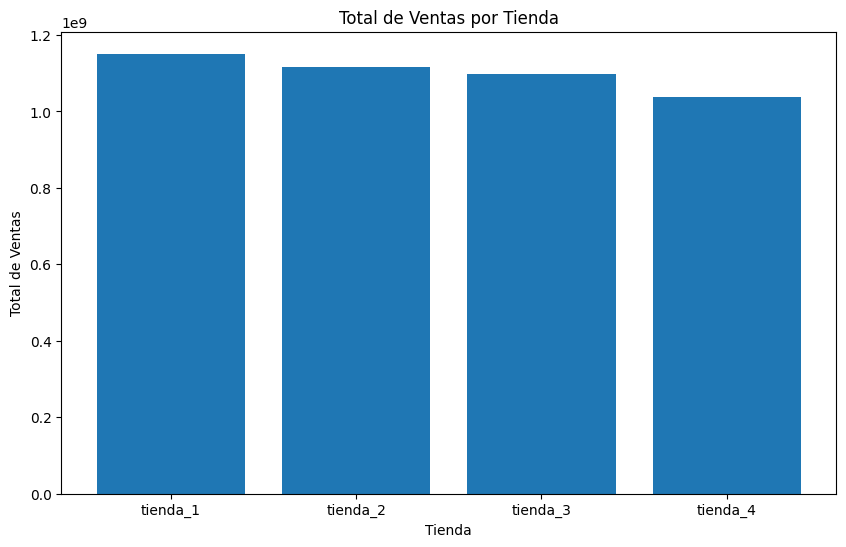

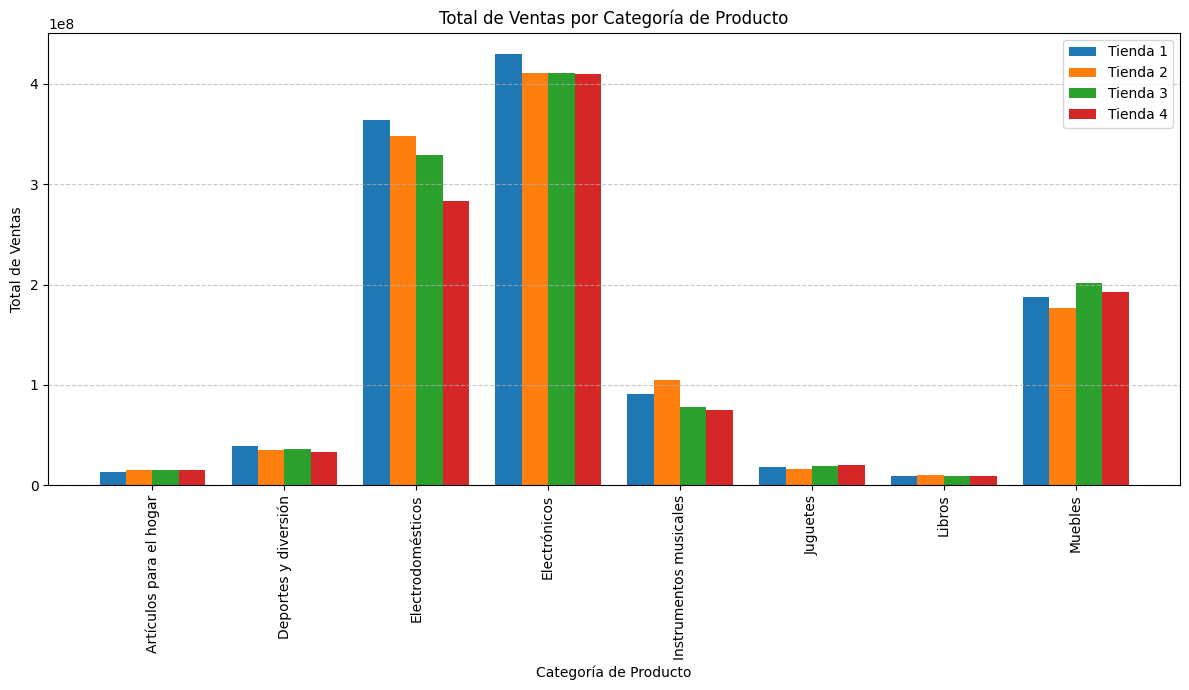

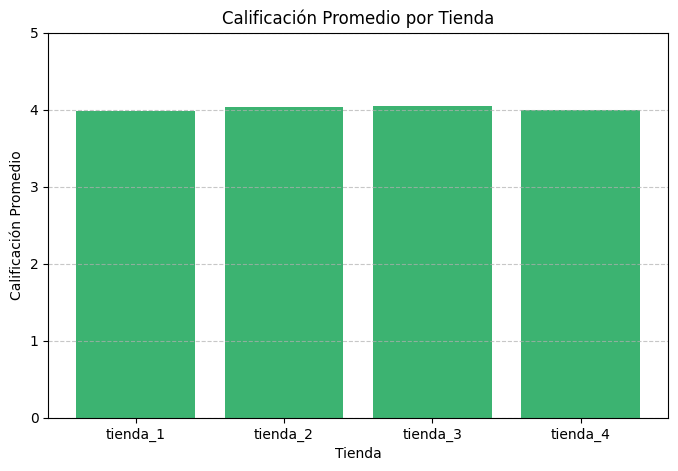

In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#Origen datos de Juan

archivos = url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

totales = {
    'tienda_1': tienda['Precio'].sum(),
    'tienda_2': tienda2['Precio'].sum(),
    'tienda_3': tienda3['Precio'].sum(),
    'tienda_4': tienda4['Precio'].sum()
}

pd.options.display.float_format = '{:,.2f}'.format
df_totales = pd.DataFrame(list(totales.items()), columns=['Tienda', 'Total'])



#Grafico de ventas por tiendas

plt.figure(figsize=(10, 6))
plt.bar(df_totales['Tienda'], df_totales['Total'])
plt.xlabel('Tienda')
plt.ylabel('Total de Ventas')
plt.title('Total de Ventas por Tienda')

#Funcion para agrupar y sumar categorias

def ventas_por_categoria(df, nombre_tienda):
    resultado = df.groupby('Categoría del Producto')['Precio'].sum().reset_index()
    resultado.columns = ['Categoría Producto', nombre_tienda]
    return resultado

#Aplica a cada tienda

cat_tienda_1 = ventas_por_categoria(tienda, 'Tienda_1')
cat_tienda_2 = ventas_por_categoria(tienda2, 'Tienda_2')
cat_tienda_3 = ventas_por_categoria(tienda3, 'Tienda_3')
cat_tienda_4 = ventas_por_categoria(tienda4, 'Tienda_4')

#Union de los resultados por categoria

df_categorias = cat_tienda_1.merge(cat_tienda_2, on='Categoría Producto', how='outer')
df_categorias = df_categorias.merge(cat_tienda_3, on='Categoría Producto', how='outer')
df_categorias = df_categorias.merge(cat_tienda_4, on='Categoría Producto', how='outer').fillna(0)

pd.options.display.float_format = '{:,.2f}'.format

plt.figure(figsize=(12, 7))
categorias = df_categorias['Categoría Producto']
x = range(len(categorias))

plt.bar(x, df_categorias['Tienda_1'], width=0.2, label='Tienda 1', align='center')
plt.bar([i + 0.2 for i in x], df_categorias['Tienda_2'], width=0.2, label='Tienda 2', align='center')
plt.bar([i + 0.4 for i in x], df_categorias['Tienda_3'], width=0.2, label='Tienda 3', align='center')
plt.bar([i + 0.6 for i in x], df_categorias['Tienda_4'], width=0.2, label='Tienda 4', align='center')

plt.xticks([i + 0.3 for i in x], categorias, rotation=90)
plt.xlabel('Categoría de Producto')
plt.ylabel('Total de Ventas')
plt.title('Total de Ventas por Categoría de Producto')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Calificación promedio de tiendas

Calificaciones = {
    'tienda_1': tienda['Calificación'].mean(),
    'tienda_2': tienda2['Calificación'].mean(),
    'tienda_3': tienda3['Calificación'].mean(),
    'tienda_4': tienda4['Calificación'].mean()
}

df_calificaciones = pd.DataFrame(list(Calificaciones.items()), columns=['Tienda', 'Calificación Promedio'])

pd.options.display.float_format = '{:,.2f}'.format

#Grafico de barras de promedio por tienda

plt.figure(figsize=(8, 5))
plt.bar(df_calificaciones['Tienda'], df_calificaciones['Calificación Promedio'], color='mediumseagreen')
plt.ylim(0, 5)
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda